# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

TRAIN = "./data/training.csv"
TEST = "./data/test.csv"
TARGET = "DiagPeriodL90D"

In [2]:
# READ THE DATA
training = pd.read_csv(TRAIN)
test = pd.read_csv(TEST)

In [3]:
# CHECKING NULLS
training.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

In [4]:
# CHECKING MEAN, MEDIAN, MODE vs Target VAR

# pd.pivot_table(training, index="DiagPeriodL90D", values=["patient_age", "bmi", "density", "age_median", "disabled", "poverty", "Ozone", "N02"], aggfunc="mean")
# pd.pivot_table(training, index="DiagPeriodL90D", values=["patient_age", "bmi", "density", "age_median", "disabled", "poverty", "Ozone", "N02"], aggfunc="median")
pd.pivot_table(training, index="DiagPeriodL90D", values=["patient_age", "bmi", "density", "age_median", "disabled", "poverty", "Ozone", "N02"], aggfunc=np.std)

,N02,Ozone,age_median,bmi,density,disabled,patient_age,poverty
DiagPeriodL90D,,,,,,,,
0,5.882738,3.542065,4.042851,5.521966,3151.927168,3.692690,12.917466,5.224511
1,5.818540,3.569973,4.033669,5.817665,2848.373287,3.688904,13.548505,5.219032


In [5]:
# CHECKING CORRELATION with TARGET

pd.set_option('display.max_columns', None)
training.corr().tail(1).sort_values(by=["DiagPeriodL90D"], axis=1)

,education_less_highschool,widowed,income_household_25_to_35,health_uninsured,commute_time,education_highschool,family_size,income_household_10_to_15,income_household_35_to_50,poverty,race_black,income_household_15_to_20,income_household_under_5,unemployment_rate,disabled,income_household_20_to_25,density,income_household_5_to_10,PM25,age_10_to_19,limited_english,age_50s,female,age_over_80,age_under_10,population,income_household_50_to_75,bmi,hispanic,housing_units,race_other,age_70s,never_married,veteran,age_60s,age_median,home_ownership,farmer,race_native,N02,divorced,rent_burden,race_asian,patient_id,age_20s,Ozone,married,male,race_multiple,education_some_college,race_pacific,race_white,education_stem_degree,education_graduate,age_30s,income_household_150_over,age_40s,family_dual_income,income_household_six_figure,self_employed,rent_median,income_household_75_to_100,income_household_median,income_household_100_to_150,labor_force_participation,education_college_or_above,home_value,income_individual_median,patient_zip3,education_bachelors,patient_age,DiagPeriodL90D
DiagPeriodL90D,-0.035954,-0.031544,-0.029044,-0.028565,-0.027375,-0.02675,-0.026735,-0.026082,-0.024927,-0.024817,-0.024484,-0.022992,-0.022534,-0.021288,-0.020376,-0.019032,-0.017286,-0.016907,-0.0165,-0.015172,-0.011443,-0.010447,-0.009982,-0.009751,-0.008986,-0.006576,-0.006312,-0.00571,-0.005,-0.004778,-0.003746,-0.003296,-0.00249,-0.001031,-0.001002,-0.000405,-0.000232,-0.000058,0.000141,0.000763,0.000968,0.001135,0.001622,0.002405,0.003433,0.007883,0.008849,0.009984,0.011407,0.012397,0.013918,0.015123,0.016777,0.017765,0.019208,0.020089,0.020943,0.022012,0.023361,0.023837,0.02477,0.024994,0.0253,0.025316,0.028169,0.029082,0.030163,0.033206,0.036372,0.037704,0.055634,1.0


In [6]:
# CHECKING HIGH NULL FIELDS

training.isnull().mean().mul(100).sort_values(ascending=False).round(6).head(10)

metastatic_first_novel_treatment         99.814040
metastatic_first_novel_treatment_type    99.814040
bmi                                      69.463815
patient_race                             49.473113
payer_type                               13.970246
Region                                    0.402913
Division                                  0.402913
patient_state                             0.395165
N02                                       0.224702
PM25                                      0.224702
dtype: float64

/home/uabyss/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='patient_race'>

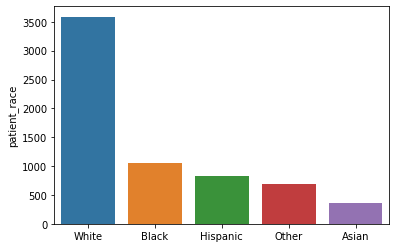

In [7]:
# CHECKING DISTRIBUTION of RACE

sns.barplot(training["patient_race"].value_counts().index, training["patient_race"].value_counts())

In [8]:
training.groupby(by="patient_race")[["patient_age",'race_white','race_black','race_asian','race_other','race_multiple','hispanic', TARGET]].mean()

,patient_age,race_white,race_black,race_asian,race_other,race_multiple,hispanic,DiagPeriodL90D
patient_race,,,,,,,,
Asian,58.386301,54.642855,10.749983,13.620138,11.005060,8.767737,28.586318,0.630137
Black,58.443182,56.160710,26.382709,5.073532,5.760398,5.996320,16.489908,0.613636
Hispanic,55.316043,59.814617,8.579597,8.411795,11.837369,10.250205,38.964538,0.632087
Other,57.171303,67.972583,10.716798,6.342526,6.362847,7.444294,21.272733,0.626647
White,61.671962,74.809587,9.126463,4.466753,4.506008,6.116373,15.308805,0.659142


In [9]:
# Replace Null values in Race
CONDITIONS = [
    training["race_asian"] > 13.5,   
    training["race_black"] > 26,
    training["hispanic"] > 38.5,
    training["race_white"] > 74.5,
    True 
]

CONDITIONS2 = [
    test["race_asian"] > 13.5,   
    test["race_black"] > 26,
    test["hispanic"] > 38.5,
    test["race_white"] > 74.5,
    True 
]
    

RACE = ["Asian", "Black", "Hispanic", "White", "Other"]

training["race"] = np.where(training["patient_race"].notnull(), training["patient_race"], np.select(CONDITIONS, RACE)) 
test["race"] = np.where(test["patient_race"].notnull(), test["patient_race"], np.select(CONDITIONS2, RACE)) 

training["race"] = training["race"].replace(RACE, [i for i in range(len(RACE))])
test["race"] = test["race"].replace(RACE, [i for i in range(len(RACE))])

In [10]:
training.groupby(by="race")[["patient_age",'race_white','race_black','race_asian','race_other','race_multiple','hispanic', TARGET]].mean()

,patient_age,race_white,race_black,race_asian,race_other,race_multiple,hispanic,DiagPeriodL90D
race,,,,,,,,
0,58.535604,51.497250,8.687285,18.668800,10.917506,9.039982,27.664751,0.642931
1,58.327179,52.777626,30.012165,4.975383,5.939482,5.687442,15.335924,0.601538
2,56.342105,59.955650,8.475876,6.991702,12.214794,11.214733,43.863091,0.625346
3,60.544793,80.256637,6.915906,3.316525,3.301102,5.302145,11.800887,0.632863
4,57.856629,67.276803,11.795880,5.566388,6.041664,7.551659,20.723548,0.609455


In [11]:
# CUSTOM PAYER ENCODING

# PAYER = ['MEDICAID', 'COMMERCIAL', 'MEDICARE ADVANTAGE']
# training["payer_type"] = training["payer_type"].fillna(3)
# training["payer_type"] = training["payer_type"].replace(PAYER, [i for i in range(len(PAYER))])

# test["payer_type"] = test["payer_type"].fillna(3)
# test["payer_type"] = test["payer_type"].replace(PAYER, [i for i in range(len(PAYER))])

In [12]:
# BREAST CANCER DESC UNNECESSARY

training[["breast_cancer_diagnosis_code","breast_cancer_diagnosis_desc","metastatic_cancer_diagnosis_code"]]

,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code
0,C50919,Malignant neoplasm of unsp site of unspecified...,C7989
1,C50411,Malig neoplm of upper-outer quadrant of right ...,C773
2,C50112,Malignant neoplasm of central portion of left ...,C773
3,C50212,Malig neoplasm of upper-inner quadrant of left...,C773
4,1749,"Malignant neoplasm of breast (female), unspeci...",C773
...,...,...,...
12901,C50411,Malig neoplm of upper-outer quadrant of right ...,C773
12902,C50912,Malignant neoplasm of unspecified site of left...,C773
12903,C50912,Malignant neoplasm of unspecified site of left...,C7931
12904,1749,"Malignant neoplasm of breast (female), unspeci...",C773


### Breast cancer code simplification (First 4 characters)

In [13]:
training["breast_cancer_diagnosis_code"] = training["breast_cancer_diagnosis_code"].apply(lambda x: x[:4])
training["metastatic_cancer_diagnosis_code"] = training["metastatic_cancer_diagnosis_code"].apply(lambda x: x[:4])

test["breast_cancer_diagnosis_code"] = test["breast_cancer_diagnosis_code"].apply(lambda x: x[:4])
test["metastatic_cancer_diagnosis_code"] = test["metastatic_cancer_diagnosis_code"].apply(lambda x: x[:4])


# ICD 10 or 9
training["codetype"] = training["breast_cancer_diagnosis_code"].apply(lambda x: int(x[0] == 'C'))
test["codetype"] = test["breast_cancer_diagnosis_code"].apply(lambda x: int(x[0] == 'C'))

In [14]:
training[["breast_cancer_diagnosis_code", "codetype"]]

,breast_cancer_diagnosis_code,codetype
0,C509,1
1,C504,1
2,C501,1
3,C502,1
4,1749,0
...,...,...
12901,C504,1
12902,C509,1
12903,C509,1
12904,1749,0


In [15]:
# DROPPING UNNECESSARY COLUMNS

waste = ["metastatic_first_novel_treatment", "metastatic_first_novel_treatment_type", "bmi", "patient_race", "patient_gender", "breast_cancer_diagnosis_desc", "patient_state"]

training = training.drop(waste, axis=1).drop("patient_id", axis=1)
test = test.drop(waste, axis=1)

In [16]:
categorical = training.select_dtypes(include=['object']).columns
numerical = training.select_dtypes(exclude=['object']).columns

In [17]:
#IMPUTE BASED ON MODE AND MEDIAN

for col in categorical:
    if col != 'DiagPeriodL90D':
        mode = training[col].mode()[0]
        training[col].fillna(mode, inplace=True)
        test[col].fillna(mode, inplace=True)

for col in numerical:
    if col != 'DiagPeriodL90D':
        mean = training[col].median()
        training[col].fillna(mean, inplace=True)
        test[col].fillna(mean, inplace=True)

In [18]:
# CHECKING IF NULLS ARE GONE

training.isnull().mean().mul(100)[training.isnull().mean().mul(100) > 0].sort_values()

Series([], dtype: float64)

In [19]:
# CATEGORICAL ENCODING

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
encoder = OneHotEncoder(sparse=False)
encoder2 = LabelEncoder()

for col in ['payer_type', 'Region', "Division"]:
    print(training[col].unique())
    encoder.fit(training[[col]])
    training[col] = encoder.transform(training[[col]])
    test[col] = encoder.transform(test[[col]])   

for col in ['breast_cancer_diagnosis_code','metastatic_cancer_diagnosis_code']:
    print(training[col].unique())
    encoder2.fit(training[[col]])
    training[col] = encoder2.transform(training[[col]])
    test[col] = encoder2.transform(test[[col]])   



['MEDICAID' 'COMMERCIAL' 'MEDICARE ADVANTAGE']
['West' 'South' 'Northeast' 'Midwest']
['Pacific' 'West South Central' 'Mountain' 'Middle Atlantic'
 'East North Central' 'East South Central' 'South Atlantic'
 'West North Central' 'New England']
['C509' 'C504' 'C501' 'C502' '1749' 'C505' '1744' 'C508' 'C503' '1741'
 '1748' '1743' 'C500' '1742' 'C506' '1746' '1988' '1745' 'C50' '1759']
['C798' 'C773' 'C779' 'C780' 'C799' 'C781' 'C786' 'C795' 'C792' 'C787'
 'C771' 'C793' 'C770' 'C782' 'C794' 'C788' 'C785' 'C778' 'C784' 'C796'
 'C772' 'C797' 'C774' 'C791' 'C790' 'C775' 'C783']


/home/uabyss/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/uabyss/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Normalization

In [20]:
norm_training = training
norm_test = test
for col in training:
    if (col != TARGET and col != "patient_id"):
        norm_training[col] = (training[col] - training[col].mean()) / training[col].std()
        norm_test[col] = (test[col] - test[col].mean()) / test[col].std()


In [21]:
import optuna
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings


xttrain = norm_training.drop(columns=[TARGET], axis=1)
yttrain = norm_training[TARGET]

x_train, x_val, y_train, y_val = train_test_split(norm_training.drop(columns=[TARGET], axis=1), norm_training[TARGET], test_size=0.2)


In [117]:
# CATBOOST OPTIMIZATION

warnings.filterwarnings('ignore')
def objective(trial):
    params = {
        "iterations": 500,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 5),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = CatBoostClassifier(**params)


    model.fit(x_train, y_train)

    y_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)

[I 2024-02-27 14:50:00,746] A new study created in memory with name: no-name-192914c6-6a80-4229-be9a-d44e93ab4b6b


0:	learn: 0.6685695	total: 20.4ms	remaining: 10.2s
1:	learn: 0.6466940	total: 31.1ms	remaining: 7.74s
2:	learn: 0.6272848	total: 42.4ms	remaining: 7.02s
3:	learn: 0.6098429	total: 62.5ms	remaining: 7.75s
4:	learn: 0.5945643	total: 75.5ms	remaining: 7.47s
5:	learn: 0.5808075	total: 89.6ms	remaining: 7.38s
6:	learn: 0.5686227	total: 102ms	remaining: 7.18s
7:	learn: 0.5577534	total: 118ms	remaining: 7.23s
8:	learn: 0.5483780	total: 130ms	remaining: 7.12s
9:	learn: 0.5399376	total: 143ms	remaining: 6.99s
10:	learn: 0.5324589	total: 160ms	remaining: 7.13s
11:	learn: 0.5256677	total: 177ms	remaining: 7.19s
12:	learn: 0.5194960	total: 189ms	remaining: 7.09s
13:	learn: 0.5141664	total: 205ms	remaining: 7.13s
14:	learn: 0.5091892	total: 217ms	remaining: 7.03s
15:	learn: 0.5049484	total: 230ms	remaining: 6.97s
16:	learn: 0.5011986	total: 239ms	remaining: 6.78s
17:	learn: 0.4974538	total: 247ms	remaining: 6.6s
18:	learn: 0.4943654	total: 253ms	remaining: 6.42s
19:	learn: 0.4913795	total: 260ms	re

[I 2024-02-27 14:50:04,471] Trial 0 finished with value: 0.813710302091402 and parameters: {'learning_rate': 0.05066938939109515, 'depth': 5, 'subsample': 0.4697399846438179, 'colsample_bylevel': 0.9983016259756639, 'min_data_in_leaf': 16}. Best is trial 0 with value: 0.813710302091402.


478:	learn: 0.4056150	total: 3.39s	remaining: 149ms
479:	learn: 0.4054683	total: 3.39s	remaining: 141ms
480:	learn: 0.4053907	total: 3.41s	remaining: 135ms
481:	learn: 0.4053313	total: 3.42s	remaining: 128ms
482:	learn: 0.4052288	total: 3.42s	remaining: 121ms
483:	learn: 0.4050444	total: 3.43s	remaining: 113ms
484:	learn: 0.4049322	total: 3.44s	remaining: 106ms
485:	learn: 0.4048686	total: 3.44s	remaining: 99.2ms
486:	learn: 0.4046860	total: 3.45s	remaining: 92.1ms
487:	learn: 0.4046300	total: 3.46s	remaining: 85ms
488:	learn: 0.4045376	total: 3.46s	remaining: 77.9ms
489:	learn: 0.4044357	total: 3.47s	remaining: 70.9ms
490:	learn: 0.4043239	total: 3.48s	remaining: 63.8ms
491:	learn: 0.4042891	total: 3.49s	remaining: 56.7ms
492:	learn: 0.4042105	total: 3.49s	remaining: 49.6ms
493:	learn: 0.4041786	total: 3.5s	remaining: 42.5ms
494:	learn: 0.4040472	total: 3.51s	remaining: 35.4ms
495:	learn: 0.4038924	total: 3.51s	remaining: 28.3ms
496:	learn: 0.4037849	total: 3.52s	remaining: 21.2ms
497

[I 2024-02-27 14:50:08,194] Trial 1 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.018290244240488085, 'depth': 5, 'subsample': 0.7941002938638069, 'colsample_bylevel': 0.9846141574826605, 'min_data_in_leaf': 90}. Best is trial 1 with value: 0.8156467854376452.


482:	learn: 0.4409919	total: 3.41s	remaining: 120ms
483:	learn: 0.4409391	total: 3.42s	remaining: 113ms
484:	learn: 0.4408938	total: 3.42s	remaining: 106ms
485:	learn: 0.4407684	total: 3.44s	remaining: 99ms
486:	learn: 0.4406685	total: 3.45s	remaining: 92ms
487:	learn: 0.4406306	total: 3.45s	remaining: 84.9ms
488:	learn: 0.4405775	total: 3.46s	remaining: 77.9ms
489:	learn: 0.4405022	total: 3.47s	remaining: 70.8ms
490:	learn: 0.4404273	total: 3.47s	remaining: 63.7ms
491:	learn: 0.4403781	total: 3.48s	remaining: 56.6ms
492:	learn: 0.4402602	total: 3.49s	remaining: 49.5ms
493:	learn: 0.4402064	total: 3.5s	remaining: 42.5ms
494:	learn: 0.4401613	total: 3.5s	remaining: 35.4ms
495:	learn: 0.4401178	total: 3.51s	remaining: 28.3ms
496:	learn: 0.4400832	total: 3.52s	remaining: 21.2ms
497:	learn: 0.4400142	total: 3.52s	remaining: 14.2ms
498:	learn: 0.4399632	total: 3.53s	remaining: 7.08ms
499:	learn: 0.4398408	total: 3.54s	remaining: 0us
0:	learn: 0.6908600	total: 5.1ms	remaining: 2.54s
1:	learn

[I 2024-02-27 14:50:10,415] Trial 2 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.004618162552541921, 'depth': 3, 'subsample': 0.6045574932414874, 'colsample_bylevel': 0.7807793570572797, 'min_data_in_leaf': 5}. Best is trial 1 with value: 0.8156467854376452.


469:	learn: 0.4716472	total: 1.93s	remaining: 123ms
470:	learn: 0.4716221	total: 1.94s	remaining: 119ms
471:	learn: 0.4715853	total: 1.94s	remaining: 115ms
472:	learn: 0.4715626	total: 1.95s	remaining: 111ms
473:	learn: 0.4715333	total: 1.95s	remaining: 107ms
474:	learn: 0.4714998	total: 1.95s	remaining: 103ms
475:	learn: 0.4714784	total: 1.96s	remaining: 98.7ms
476:	learn: 0.4714541	total: 1.96s	remaining: 94.6ms
477:	learn: 0.4714357	total: 1.97s	remaining: 90.4ms
478:	learn: 0.4714005	total: 1.97s	remaining: 86.4ms
479:	learn: 0.4713719	total: 1.97s	remaining: 82.2ms
480:	learn: 0.4713326	total: 1.98s	remaining: 78.1ms
481:	learn: 0.4713067	total: 1.98s	remaining: 74ms
482:	learn: 0.4712920	total: 1.99s	remaining: 69.9ms
483:	learn: 0.4712592	total: 1.99s	remaining: 65.7ms
484:	learn: 0.4712362	total: 1.99s	remaining: 61.6ms
485:	learn: 0.4712114	total: 2s	remaining: 57.5ms
486:	learn: 0.4711717	total: 2s	remaining: 53.4ms
487:	learn: 0.4711331	total: 2s	remaining: 49.2ms
488:	learn

[I 2024-02-27 14:50:12,848] Trial 3 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.0031794955512506632, 'depth': 4, 'subsample': 0.849988090316509, 'colsample_bylevel': 0.7384400466934188, 'min_data_in_leaf': 82}. Best is trial 1 with value: 0.8156467854376452.


476:	learn: 0.4778575	total: 2.17s	remaining: 105ms
477:	learn: 0.4777907	total: 2.17s	remaining: 100ms
478:	learn: 0.4777263	total: 2.18s	remaining: 95.6ms
479:	learn: 0.4776687	total: 2.19s	remaining: 91.1ms
480:	learn: 0.4775969	total: 2.19s	remaining: 86.6ms
481:	learn: 0.4775411	total: 2.2s	remaining: 82ms
482:	learn: 0.4774782	total: 2.2s	remaining: 77.5ms
483:	learn: 0.4774090	total: 2.2s	remaining: 72.9ms
484:	learn: 0.4773400	total: 2.21s	remaining: 68.3ms
485:	learn: 0.4772861	total: 2.21s	remaining: 63.8ms
486:	learn: 0.4772312	total: 2.22s	remaining: 59.2ms
487:	learn: 0.4771726	total: 2.22s	remaining: 54.6ms
488:	learn: 0.4771234	total: 2.22s	remaining: 50ms
489:	learn: 0.4770549	total: 2.23s	remaining: 45.5ms
490:	learn: 0.4769946	total: 2.23s	remaining: 40.9ms
491:	learn: 0.4769281	total: 2.24s	remaining: 36.4ms
492:	learn: 0.4768753	total: 2.24s	remaining: 31.8ms
493:	learn: 0.4768218	total: 2.24s	remaining: 27.3ms
494:	learn: 0.4767686	total: 2.25s	remaining: 22.7ms
49

[I 2024-02-27 14:50:15,315] Trial 4 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.0015797511418746573, 'depth': 4, 'subsample': 0.2303740773488696, 'colsample_bylevel': 0.5913278241449683, 'min_data_in_leaf': 38}. Best is trial 1 with value: 0.8156467854376452.


471:	learn: 0.5132569	total: 2.18s	remaining: 129ms
472:	learn: 0.5131098	total: 2.19s	remaining: 125ms
473:	learn: 0.5129562	total: 2.19s	remaining: 120ms
474:	learn: 0.5128086	total: 2.2s	remaining: 116ms
475:	learn: 0.5126555	total: 2.2s	remaining: 111ms
476:	learn: 0.5125044	total: 2.21s	remaining: 106ms
477:	learn: 0.5123563	total: 2.21s	remaining: 102ms
478:	learn: 0.5122117	total: 2.21s	remaining: 97ms
479:	learn: 0.5120690	total: 2.22s	remaining: 92.4ms
480:	learn: 0.5119254	total: 2.22s	remaining: 87.7ms
481:	learn: 0.5117827	total: 2.22s	remaining: 83.1ms
482:	learn: 0.5116422	total: 2.23s	remaining: 78.4ms
483:	learn: 0.5115005	total: 2.23s	remaining: 73.8ms
484:	learn: 0.5113586	total: 2.24s	remaining: 69.2ms
485:	learn: 0.5112197	total: 2.24s	remaining: 64.5ms
486:	learn: 0.5110778	total: 2.24s	remaining: 59.9ms
487:	learn: 0.5109382	total: 2.25s	remaining: 55.3ms
488:	learn: 0.5108003	total: 2.25s	remaining: 50.7ms
489:	learn: 0.5106594	total: 2.26s	remaining: 46ms
490:	l

[I 2024-02-27 14:50:17,618] Trial 5 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.007649801784770979, 'depth': 4, 'subsample': 0.42802172095503355, 'colsample_bylevel': 0.4525049387423957, 'min_data_in_leaf': 46}. Best is trial 1 with value: 0.8156467854376452.


465:	learn: 0.4636568	total: 1.98s	remaining: 144ms
466:	learn: 0.4636431	total: 1.98s	remaining: 140ms
467:	learn: 0.4636197	total: 1.99s	remaining: 136ms
468:	learn: 0.4635907	total: 1.99s	remaining: 132ms
469:	learn: 0.4635635	total: 2s	remaining: 128ms
470:	learn: 0.4635509	total: 2s	remaining: 123ms
471:	learn: 0.4635333	total: 2.01s	remaining: 119ms
472:	learn: 0.4635002	total: 2.01s	remaining: 115ms
473:	learn: 0.4634877	total: 2.02s	remaining: 111ms
474:	learn: 0.4634711	total: 2.02s	remaining: 106ms
475:	learn: 0.4634503	total: 2.03s	remaining: 102ms
476:	learn: 0.4634382	total: 2.03s	remaining: 97.9ms
477:	learn: 0.4634288	total: 2.04s	remaining: 93.7ms
478:	learn: 0.4634076	total: 2.04s	remaining: 89.5ms
479:	learn: 0.4633945	total: 2.04s	remaining: 85.2ms
480:	learn: 0.4633774	total: 2.05s	remaining: 80.9ms
481:	learn: 0.4633583	total: 2.05s	remaining: 76.7ms
482:	learn: 0.4633409	total: 2.06s	remaining: 72.4ms
483:	learn: 0.4633232	total: 2.06s	remaining: 68.2ms
484:	learn

[I 2024-02-27 14:50:22,666] Trial 6 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.0012534742002570526, 'depth': 5, 'subsample': 0.7091671712092904, 'colsample_bylevel': 0.7002809643901877, 'min_data_in_leaf': 44}. Best is trial 1 with value: 0.8156467854376452.


498:	learn: 0.5252937	total: 4.87s	remaining: 9.77ms
499:	learn: 0.5251429	total: 4.88s	remaining: 0us
0:	learn: 0.6910538	total: 4.14ms	remaining: 2.06s
1:	learn: 0.6889786	total: 6.46ms	remaining: 1.61s
2:	learn: 0.6869247	total: 9.08ms	remaining: 1.5s
3:	learn: 0.6866717	total: 12.5ms	remaining: 1.54s
4:	learn: 0.6846423	total: 14.9ms	remaining: 1.47s
5:	learn: 0.6826371	total: 18.7ms	remaining: 1.54s
6:	learn: 0.6806369	total: 21.6ms	remaining: 1.52s
7:	learn: 0.6786540	total: 24.5ms	remaining: 1.51s
8:	learn: 0.6783743	total: 28.1ms	remaining: 1.53s
9:	learn: 0.6764244	total: 31.2ms	remaining: 1.53s
10:	learn: 0.6744872	total: 33.6ms	remaining: 1.49s
11:	learn: 0.6725698	total: 37.6ms	remaining: 1.53s
12:	learn: 0.6706694	total: 40.5ms	remaining: 1.52s
13:	learn: 0.6703951	total: 44.8ms	remaining: 1.55s
14:	learn: 0.6685183	total: 47.6ms	remaining: 1.54s
15:	learn: 0.6666530	total: 50.6ms	remaining: 1.53s
16:	learn: 0.6648136	total: 54.1ms	remaining: 1.54s
17:	learn: 0.6629759	tot

[I 2024-02-27 14:50:24,378] Trial 7 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.004223093236328699, 'depth': 2, 'subsample': 0.6260017503819947, 'colsample_bylevel': 0.3820689783528474, 'min_data_in_leaf': 57}. Best is trial 1 with value: 0.8156467854376452.


471:	learn: 0.4764570	total: 1.47s	remaining: 87.3ms
472:	learn: 0.4763993	total: 1.47s	remaining: 84.2ms
473:	learn: 0.4763492	total: 1.48s	remaining: 81.1ms
474:	learn: 0.4763040	total: 1.48s	remaining: 77.9ms
475:	learn: 0.4762814	total: 1.48s	remaining: 74.8ms
476:	learn: 0.4762237	total: 1.49s	remaining: 71.7ms
477:	learn: 0.4761738	total: 1.49s	remaining: 68.6ms
478:	learn: 0.4761172	total: 1.49s	remaining: 65.5ms
479:	learn: 0.4760732	total: 1.5s	remaining: 62.4ms
480:	learn: 0.4760176	total: 1.5s	remaining: 59.2ms
481:	learn: 0.4760055	total: 1.5s	remaining: 56.1ms
482:	learn: 0.4759650	total: 1.5s	remaining: 52.9ms
483:	learn: 0.4759110	total: 1.51s	remaining: 49.8ms
484:	learn: 0.4758701	total: 1.51s	remaining: 46.7ms
485:	learn: 0.4758301	total: 1.51s	remaining: 43.6ms
486:	learn: 0.4757830	total: 1.51s	remaining: 40.5ms
487:	learn: 0.4757293	total: 1.52s	remaining: 37.3ms
488:	learn: 0.4756850	total: 1.52s	remaining: 34.2ms
489:	learn: 0.4756556	total: 1.52s	remaining: 31.1

[I 2024-02-27 14:50:26,465] Trial 8 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.007446548818972293, 'depth': 4, 'subsample': 0.08853495310927624, 'colsample_bylevel': 0.4972754830465494, 'min_data_in_leaf': 74}. Best is trial 1 with value: 0.8156467854376452.


465:	learn: 0.4671877	total: 1.79s	remaining: 131ms
466:	learn: 0.4671633	total: 1.8s	remaining: 127ms
467:	learn: 0.4671301	total: 1.8s	remaining: 123ms
468:	learn: 0.4671232	total: 1.81s	remaining: 120ms
469:	learn: 0.4670970	total: 1.81s	remaining: 116ms
470:	learn: 0.4670907	total: 1.82s	remaining: 112ms
471:	learn: 0.4670663	total: 1.82s	remaining: 108ms
472:	learn: 0.4670471	total: 1.82s	remaining: 104ms
473:	learn: 0.4670179	total: 1.83s	remaining: 100ms
474:	learn: 0.4669889	total: 1.83s	remaining: 96.4ms
475:	learn: 0.4669816	total: 1.83s	remaining: 92.6ms
476:	learn: 0.4669644	total: 1.84s	remaining: 88.7ms
477:	learn: 0.4669437	total: 1.84s	remaining: 84.8ms
478:	learn: 0.4669388	total: 1.85s	remaining: 81ms
479:	learn: 0.4669311	total: 1.85s	remaining: 77.1ms
480:	learn: 0.4669262	total: 1.85s	remaining: 73.3ms
481:	learn: 0.4669206	total: 1.86s	remaining: 69.4ms
482:	learn: 0.4669094	total: 1.86s	remaining: 65.5ms
483:	learn: 0.4669027	total: 1.86s	remaining: 61.7ms
484:	l

[I 2024-02-27 14:50:27,957] Trial 9 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.004713496823328946, 'depth': 1, 'subsample': 0.10044505295604389, 'colsample_bylevel': 0.8466820178404969, 'min_data_in_leaf': 61}. Best is trial 1 with value: 0.8156467854376452.


494:	learn: 0.4763108	total: 1.32s	remaining: 13.4ms
495:	learn: 0.4763051	total: 1.33s	remaining: 10.7ms
496:	learn: 0.4762890	total: 1.33s	remaining: 8.03ms
497:	learn: 0.4762839	total: 1.33s	remaining: 5.35ms
498:	learn: 0.4762769	total: 1.33s	remaining: 2.67ms
499:	learn: 0.4762721	total: 1.34s	remaining: 0us
0:	learn: 0.6909240	total: 4.18ms	remaining: 2.08s
1:	learn: 0.6888263	total: 7.82ms	remaining: 1.95s
2:	learn: 0.6752727	total: 12.1ms	remaining: 2.01s
3:	learn: 0.6626153	total: 16.1ms	remaining: 2s
4:	learn: 0.6505892	total: 18.6ms	remaining: 1.84s
5:	learn: 0.6492915	total: 21.1ms	remaining: 1.74s
6:	learn: 0.6480563	total: 25.1ms	remaining: 1.77s
7:	learn: 0.6370073	total: 28.5ms	remaining: 1.75s
8:	learn: 0.6267224	total: 32.9ms	remaining: 1.79s
9:	learn: 0.6257013	total: 35.2ms	remaining: 1.72s
10:	learn: 0.6247344	total: 37.4ms	remaining: 1.66s
11:	learn: 0.6238160	total: 39.6ms	remaining: 1.61s
12:	learn: 0.6143491	total: 42.2ms	remaining: 1.58s
13:	learn: 0.6135170	t

[I 2024-02-27 14:50:29,702] Trial 10 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.028230001442106793, 'depth': 2, 'subsample': 0.9212595818520707, 'colsample_bylevel': 0.09391283705215864, 'min_data_in_leaf': 96}. Best is trial 1 with value: 0.8156467854376452.


464:	learn: 0.4606817	total: 1.44s	remaining: 109ms
465:	learn: 0.4606536	total: 1.45s	remaining: 106ms
466:	learn: 0.4606230	total: 1.46s	remaining: 103ms
467:	learn: 0.4605804	total: 1.46s	remaining: 99.9ms
468:	learn: 0.4605573	total: 1.47s	remaining: 96.9ms
469:	learn: 0.4605176	total: 1.47s	remaining: 93.9ms
470:	learn: 0.4605017	total: 1.47s	remaining: 90.8ms
471:	learn: 0.4604803	total: 1.48s	remaining: 87.6ms
472:	learn: 0.4604424	total: 1.48s	remaining: 84.6ms
473:	learn: 0.4604217	total: 1.49s	remaining: 81.6ms
474:	learn: 0.4603821	total: 1.49s	remaining: 78.5ms
475:	learn: 0.4603486	total: 1.49s	remaining: 75.3ms
476:	learn: 0.4603257	total: 1.5s	remaining: 72.3ms
477:	learn: 0.4603044	total: 1.5s	remaining: 69.1ms
478:	learn: 0.4602628	total: 1.5s	remaining: 66ms
479:	learn: 0.4602375	total: 1.51s	remaining: 62.9ms
480:	learn: 0.4602111	total: 1.51s	remaining: 59.7ms
481:	learn: 0.4601866	total: 1.52s	remaining: 56.7ms
482:	learn: 0.4601690	total: 1.52s	remaining: 53.5ms
4

[I 2024-02-27 14:50:31,821] Trial 11 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.020337011281587703, 'depth': 3, 'subsample': 0.7599081044296127, 'colsample_bylevel': 0.999464662569631, 'min_data_in_leaf': 4}. Best is trial 1 with value: 0.8156467854376452.


496:	learn: 0.4547253	total: 1.93s	remaining: 11.7ms
497:	learn: 0.4546895	total: 1.94s	remaining: 7.78ms
498:	learn: 0.4546546	total: 1.94s	remaining: 3.89ms
499:	learn: 0.4546017	total: 1.95s	remaining: 0us
0:	learn: 0.6474684	total: 3.27ms	remaining: 1.63s
1:	learn: 0.6114596	total: 7.22ms	remaining: 1.8s
2:	learn: 0.5829617	total: 10.5ms	remaining: 1.73s
3:	learn: 0.5604637	total: 14.6ms	remaining: 1.81s
4:	learn: 0.5425133	total: 18.2ms	remaining: 1.8s
5:	learn: 0.5283902	total: 21.3ms	remaining: 1.76s
6:	learn: 0.5171643	total: 24.7ms	remaining: 1.74s
7:	learn: 0.5082283	total: 28.6ms	remaining: 1.76s
8:	learn: 0.5010820	total: 32.1ms	remaining: 1.75s
9:	learn: 0.4951111	total: 35.6ms	remaining: 1.74s
10:	learn: 0.4905302	total: 43.1ms	remaining: 1.92s
11:	learn: 0.4868723	total: 47ms	remaining: 1.91s
12:	learn: 0.4835130	total: 51.3ms	remaining: 1.92s
13:	learn: 0.4806210	total: 55.3ms	remaining: 1.92s
14:	learn: 0.4785228	total: 58.8ms	remaining: 1.9s
15:	learn: 0.4766736	total

[I 2024-02-27 14:50:33,983] Trial 12 finished with value: 0.8121611154144074 and parameters: {'learning_rate': 0.0975392062277467, 'depth': 3, 'subsample': 0.9751510913536574, 'colsample_bylevel': 0.8410591647280614, 'min_data_in_leaf': 17}. Best is trial 1 with value: 0.8156467854376452.


467:	learn: 0.4078721	total: 1.87s	remaining: 128ms
468:	learn: 0.4077434	total: 1.87s	remaining: 124ms
469:	learn: 0.4076584	total: 1.88s	remaining: 120ms
470:	learn: 0.4075590	total: 1.88s	remaining: 116ms
471:	learn: 0.4075133	total: 1.88s	remaining: 112ms
472:	learn: 0.4074545	total: 1.89s	remaining: 108ms
473:	learn: 0.4073247	total: 1.89s	remaining: 104ms
474:	learn: 0.4072131	total: 1.9s	remaining: 99.8ms
475:	learn: 0.4070908	total: 1.9s	remaining: 95.8ms
476:	learn: 0.4070312	total: 1.9s	remaining: 91.8ms
477:	learn: 0.4069135	total: 1.91s	remaining: 87.7ms
478:	learn: 0.4068147	total: 1.91s	remaining: 83.8ms
479:	learn: 0.4067628	total: 1.92s	remaining: 79.8ms
480:	learn: 0.4066724	total: 1.92s	remaining: 75.8ms
481:	learn: 0.4065842	total: 1.92s	remaining: 71.8ms
482:	learn: 0.4065324	total: 1.93s	remaining: 67.8ms
483:	learn: 0.4064312	total: 1.93s	remaining: 63.8ms
484:	learn: 0.4063638	total: 1.93s	remaining: 59.8ms
485:	learn: 0.4062690	total: 1.94s	remaining: 55.8ms
486

[I 2024-02-27 14:50:35,765] Trial 13 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.01581828380535277, 'depth': 2, 'subsample': 0.5827001667160839, 'colsample_bylevel': 0.8480306952511978, 'min_data_in_leaf': 99}. Best is trial 1 with value: 0.8156467854376452.


478:	learn: 0.4639416	total: 1.54s	remaining: 67.4ms
479:	learn: 0.4639234	total: 1.54s	remaining: 64.2ms
480:	learn: 0.4639139	total: 1.54s	remaining: 61ms
481:	learn: 0.4639049	total: 1.55s	remaining: 57.8ms
482:	learn: 0.4638878	total: 1.55s	remaining: 54.5ms
483:	learn: 0.4638676	total: 1.55s	remaining: 51.4ms
484:	learn: 0.4638433	total: 1.56s	remaining: 48.2ms
485:	learn: 0.4638341	total: 1.56s	remaining: 45ms
486:	learn: 0.4638265	total: 1.56s	remaining: 41.8ms
487:	learn: 0.4638215	total: 1.57s	remaining: 38.5ms
488:	learn: 0.4638114	total: 1.57s	remaining: 35.3ms
489:	learn: 0.4637684	total: 1.57s	remaining: 32.1ms
490:	learn: 0.4637536	total: 1.57s	remaining: 28.9ms
491:	learn: 0.4637374	total: 1.58s	remaining: 25.7ms
492:	learn: 0.4637210	total: 1.58s	remaining: 22.5ms
493:	learn: 0.4637086	total: 1.58s	remaining: 19.2ms
494:	learn: 0.4636901	total: 1.59s	remaining: 16ms
495:	learn: 0.4636734	total: 1.59s	remaining: 12.8ms
496:	learn: 0.4636659	total: 1.59s	remaining: 9.62ms

[I 2024-02-27 14:50:39,466] Trial 14 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.012166615348375057, 'depth': 5, 'subsample': 0.33610011864753875, 'colsample_bylevel': 0.27408660017052866, 'min_data_in_leaf': 24}. Best is trial 1 with value: 0.8156467854376452.


490:	learn: 0.4533321	total: 3.44s	remaining: 63.1ms
491:	learn: 0.4533115	total: 3.45s	remaining: 56.1ms
492:	learn: 0.4532958	total: 3.45s	remaining: 49ms
493:	learn: 0.4532872	total: 3.47s	remaining: 42.1ms
494:	learn: 0.4532608	total: 3.47s	remaining: 35.1ms
495:	learn: 0.4532319	total: 3.48s	remaining: 28.1ms
496:	learn: 0.4532065	total: 3.48s	remaining: 21ms
497:	learn: 0.4531805	total: 3.49s	remaining: 14ms
498:	learn: 0.4531604	total: 3.49s	remaining: 7ms
499:	learn: 0.4531364	total: 3.5s	remaining: 0us
0:	learn: 0.6919747	total: 3.92ms	remaining: 1.96s
1:	learn: 0.6908098	total: 9.26ms	remaining: 2.31s
2:	learn: 0.6896479	total: 16.5ms	remaining: 2.73s
3:	learn: 0.6884965	total: 19.6ms	remaining: 2.44s
4:	learn: 0.6873443	total: 23.5ms	remaining: 2.32s
5:	learn: 0.6862039	total: 26.6ms	remaining: 2.19s
6:	learn: 0.6850677	total: 31.1ms	remaining: 2.19s
7:	learn: 0.6839369	total: 34.5ms	remaining: 2.12s
8:	learn: 0.6828144	total: 37.9ms	remaining: 2.07s
9:	learn: 0.6816972	tota

[I 2024-02-27 14:50:41,900] Trial 15 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.002358744715465354, 'depth': 3, 'subsample': 0.748820070225213, 'colsample_bylevel': 0.6542347382836772, 'min_data_in_leaf': 72}. Best is trial 1 with value: 0.8156467854376452.


484:	learn: 0.4896327	total: 2.17s	remaining: 67.3ms
485:	learn: 0.4895312	total: 2.18s	remaining: 62.8ms
486:	learn: 0.4894395	total: 2.18s	remaining: 58.3ms
487:	learn: 0.4893488	total: 2.19s	remaining: 53.8ms
488:	learn: 0.4892584	total: 2.19s	remaining: 49.4ms
489:	learn: 0.4891677	total: 2.2s	remaining: 44.9ms
490:	learn: 0.4890771	total: 2.2s	remaining: 40.4ms
491:	learn: 0.4889873	total: 2.21s	remaining: 35.9ms
492:	learn: 0.4888978	total: 2.21s	remaining: 31.4ms
493:	learn: 0.4888011	total: 2.21s	remaining: 26.9ms
494:	learn: 0.4887119	total: 2.22s	remaining: 22.4ms
495:	learn: 0.4886243	total: 2.22s	remaining: 17.9ms
496:	learn: 0.4885373	total: 2.22s	remaining: 13.4ms
497:	learn: 0.4884507	total: 2.23s	remaining: 8.95ms
498:	learn: 0.4883607	total: 2.23s	remaining: 4.47ms
499:	learn: 0.4882657	total: 2.23s	remaining: 0us
0:	learn: 0.6797337	total: 2.9ms	remaining: 1.45s
1:	learn: 0.6671348	total: 4.69ms	remaining: 1.17s
2:	learn: 0.6553096	total: 6.55ms	remaining: 1.08s
3:	le

[I 2024-02-27 14:50:43,531] Trial 16 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.027478220953300894, 'depth': 1, 'subsample': 0.6381100872112745, 'colsample_bylevel': 0.9173205821580843, 'min_data_in_leaf': 28}. Best is trial 1 with value: 0.8156467854376452.


474:	learn: 0.4646664	total: 1.38s	remaining: 72.4ms
475:	learn: 0.4646441	total: 1.38s	remaining: 69.5ms
476:	learn: 0.4646320	total: 1.38s	remaining: 66.6ms
477:	learn: 0.4646182	total: 1.39s	remaining: 63.8ms
478:	learn: 0.4646151	total: 1.39s	remaining: 60.9ms
479:	learn: 0.4646043	total: 1.39s	remaining: 58.1ms
480:	learn: 0.4645922	total: 1.4s	remaining: 55.1ms
481:	learn: 0.4645804	total: 1.4s	remaining: 52.2ms
482:	learn: 0.4645694	total: 1.4s	remaining: 49.3ms
483:	learn: 0.4645580	total: 1.4s	remaining: 46.4ms
484:	learn: 0.4645478	total: 1.41s	remaining: 43.5ms
485:	learn: 0.4645360	total: 1.41s	remaining: 40.6ms
486:	learn: 0.4645252	total: 1.41s	remaining: 37.7ms
487:	learn: 0.4645111	total: 1.41s	remaining: 34.8ms
488:	learn: 0.4645000	total: 1.42s	remaining: 31.9ms
489:	learn: 0.4644895	total: 1.42s	remaining: 29ms
490:	learn: 0.4644808	total: 1.42s	remaining: 26.1ms
491:	learn: 0.4644682	total: 1.43s	remaining: 23.2ms
492:	learn: 0.4644597	total: 1.43s	remaining: 20.3ms

[I 2024-02-27 14:50:45,385] Trial 17 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.008463545620826926, 'depth': 2, 'subsample': 0.8411405072972682, 'colsample_bylevel': 0.7247759607583188, 'min_data_in_leaf': 1}. Best is trial 1 with value: 0.8156467854376452.


463:	learn: 0.4683780	total: 1.56s	remaining: 121ms
464:	learn: 0.4683592	total: 1.57s	remaining: 118ms
465:	learn: 0.4683467	total: 1.57s	remaining: 115ms
466:	learn: 0.4683385	total: 1.58s	remaining: 111ms
467:	learn: 0.4683255	total: 1.58s	remaining: 108ms
468:	learn: 0.4683170	total: 1.58s	remaining: 105ms
469:	learn: 0.4682962	total: 1.59s	remaining: 101ms
470:	learn: 0.4682855	total: 1.59s	remaining: 97.9ms
471:	learn: 0.4682707	total: 1.59s	remaining: 94.5ms
472:	learn: 0.4682628	total: 1.6s	remaining: 91.1ms
473:	learn: 0.4682496	total: 1.6s	remaining: 87.7ms
474:	learn: 0.4682297	total: 1.6s	remaining: 84.3ms
475:	learn: 0.4682180	total: 1.6s	remaining: 80.9ms
476:	learn: 0.4682098	total: 1.61s	remaining: 77.5ms
477:	learn: 0.4681893	total: 1.61s	remaining: 74.1ms
478:	learn: 0.4681835	total: 1.61s	remaining: 70.7ms
479:	learn: 0.4681610	total: 1.61s	remaining: 67.3ms
480:	learn: 0.4681434	total: 1.62s	remaining: 64ms
481:	learn: 0.4681223	total: 1.62s	remaining: 60.6ms
482:	l

[I 2024-02-27 14:50:48,121] Trial 18 finished with value: 0.814872192099148 and parameters: {'learning_rate': 0.044884366349174094, 'depth': 4, 'subsample': 0.5516620655220621, 'colsample_bylevel': 0.7915415965564659, 'min_data_in_leaf': 86}. Best is trial 1 with value: 0.8156467854376452.


0:	learn: 0.6907618	total: 5.67ms	remaining: 2.83s
1:	learn: 0.6884053	total: 9.54ms	remaining: 2.38s
2:	learn: 0.6860751	total: 13.7ms	remaining: 2.27s
3:	learn: 0.6837656	total: 19.4ms	remaining: 2.41s
4:	learn: 0.6814816	total: 23ms	remaining: 2.27s
5:	learn: 0.6792051	total: 26.7ms	remaining: 2.2s
6:	learn: 0.6769645	total: 30.6ms	remaining: 2.15s
7:	learn: 0.6747469	total: 33.9ms	remaining: 2.09s
8:	learn: 0.6725304	total: 37.9ms	remaining: 2.07s
9:	learn: 0.6703587	total: 41.4ms	remaining: 2.03s
10:	learn: 0.6682216	total: 44.5ms	remaining: 1.98s
11:	learn: 0.6661151	total: 48.4ms	remaining: 1.97s
12:	learn: 0.6640202	total: 52.1ms	remaining: 1.95s
13:	learn: 0.6619469	total: 55.9ms	remaining: 1.94s
14:	learn: 0.6599004	total: 59.2ms	remaining: 1.91s
15:	learn: 0.6578696	total: 63.8ms	remaining: 1.93s
16:	learn: 0.6558645	total: 66.8ms	remaining: 1.9s
17:	learn: 0.6538890	total: 71.1ms	remaining: 1.91s
18:	learn: 0.6519130	total: 74.4ms	remaining: 1.88s
19:	learn: 0.6499823	total

[I 2024-02-27 14:50:50,272] Trial 19 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.004806577838626542, 'depth': 3, 'subsample': 0.3704872766426634, 'colsample_bylevel': 0.5980743591488994, 'min_data_in_leaf': 66}. Best is trial 1 with value: 0.8156467854376452.


486:	learn: 0.4709148	total: 1.91s	remaining: 51.1ms
487:	learn: 0.4708852	total: 1.92s	remaining: 47.1ms
488:	learn: 0.4708702	total: 1.92s	remaining: 43.2ms
489:	learn: 0.4708463	total: 1.92s	remaining: 39.3ms
490:	learn: 0.4708301	total: 1.93s	remaining: 35.4ms
491:	learn: 0.4707969	total: 1.93s	remaining: 31.5ms
492:	learn: 0.4707645	total: 1.94s	remaining: 27.5ms
493:	learn: 0.4707567	total: 1.94s	remaining: 23.6ms
494:	learn: 0.4707380	total: 1.95s	remaining: 19.7ms
495:	learn: 0.4707071	total: 1.95s	remaining: 15.7ms
496:	learn: 0.4706869	total: 1.95s	remaining: 11.8ms
497:	learn: 0.4706597	total: 1.96s	remaining: 7.86ms
498:	learn: 0.4706424	total: 1.96s	remaining: 3.93ms
499:	learn: 0.4706250	total: 1.96s	remaining: 0us
0:	learn: 0.6919261	total: 6.55ms	remaining: 3.27s
1:	learn: 0.6907136	total: 12.8ms	remaining: 3.19s
2:	learn: 0.6895159	total: 22.3ms	remaining: 3.7s
3:	learn: 0.6883141	total: 28.9ms	remaining: 3.58s
4:	learn: 0.6871287	total: 34.7ms	remaining: 3.43s
5:	lear

[I 2024-02-27 14:50:54,673] Trial 20 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.002422041017682097, 'depth': 5, 'subsample': 0.6911599073659866, 'colsample_bylevel': 0.8979595836335552, 'min_data_in_leaf': 35}. Best is trial 1 with value: 0.8156467854376452.


488:	learn: 0.4850992	total: 4.1s	remaining: 92.3ms
489:	learn: 0.4850004	total: 4.11s	remaining: 84ms
490:	learn: 0.4849155	total: 4.12s	remaining: 75.5ms
491:	learn: 0.4848210	total: 4.13s	remaining: 67.1ms
492:	learn: 0.4847256	total: 4.13s	remaining: 58.7ms
493:	learn: 0.4846380	total: 4.14s	remaining: 50.3ms
494:	learn: 0.4845490	total: 4.15s	remaining: 41.9ms
495:	learn: 0.4844520	total: 4.15s	remaining: 33.5ms
496:	learn: 0.4843569	total: 4.16s	remaining: 25.1ms
497:	learn: 0.4842675	total: 4.17s	remaining: 16.7ms
498:	learn: 0.4841862	total: 4.17s	remaining: 8.37ms
499:	learn: 0.4840966	total: 4.18s	remaining: 0us
0:	learn: 0.6917362	total: 6.41ms	remaining: 3.2s
1:	learn: 0.6903473	total: 11.9ms	remaining: 2.97s
2:	learn: 0.6889614	total: 17.2ms	remaining: 2.85s
3:	learn: 0.6875777	total: 28.2ms	remaining: 3.49s
4:	learn: 0.6862131	total: 33.4ms	remaining: 3.31s
5:	learn: 0.6848485	total: 39.9ms	remaining: 3.29s
6:	learn: 0.6834945	total: 45.6ms	remaining: 3.21s
7:	learn: 0.68

[I 2024-02-27 14:50:57,698] Trial 21 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.0028159648109746297, 'depth': 4, 'subsample': 0.8434176054429567, 'colsample_bylevel': 0.7352430319214118, 'min_data_in_leaf': 85}. Best is trial 1 with value: 0.8156467854376452.


497:	learn: 0.4801417	total: 2.81s	remaining: 11.3ms
498:	learn: 0.4800680	total: 2.81s	remaining: 5.63ms
499:	learn: 0.4800020	total: 2.82s	remaining: 0us
0:	learn: 0.6911756	total: 4.73ms	remaining: 2.36s
1:	learn: 0.6892249	total: 9.49ms	remaining: 2.36s
2:	learn: 0.6872984	total: 14.9ms	remaining: 2.47s
3:	learn: 0.6853694	total: 21.4ms	remaining: 2.65s
4:	learn: 0.6834626	total: 25.9ms	remaining: 2.56s
5:	learn: 0.6815791	total: 31.3ms	remaining: 2.58s
6:	learn: 0.6797115	total: 36.2ms	remaining: 2.55s
7:	learn: 0.6778550	total: 41.5ms	remaining: 2.55s
8:	learn: 0.6760028	total: 46.9ms	remaining: 2.56s
9:	learn: 0.6741689	total: 51.4ms	remaining: 2.52s
10:	learn: 0.6723619	total: 56.2ms	remaining: 2.5s
11:	learn: 0.6705829	total: 61.7ms	remaining: 2.51s
12:	learn: 0.6688085	total: 67.1ms	remaining: 2.51s
13:	learn: 0.6670450	total: 72ms	remaining: 2.5s
14:	learn: 0.6653088	total: 77.7ms	remaining: 2.51s
15:	learn: 0.6635882	total: 88.2ms	remaining: 2.67s
16:	learn: 0.6618691	total

[I 2024-02-27 14:51:00,433] Trial 22 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.003957733302086522, 'depth': 4, 'subsample': 0.8439211851337256, 'colsample_bylevel': 0.9180665741727043, 'min_data_in_leaf': 86}. Best is trial 1 with value: 0.8156467854376452.


479:	learn: 0.4720055	total: 2.46s	remaining: 102ms
480:	learn: 0.4719743	total: 2.46s	remaining: 97.3ms
481:	learn: 0.4719307	total: 2.47s	remaining: 92.2ms
482:	learn: 0.4718845	total: 2.48s	remaining: 87.1ms
483:	learn: 0.4718278	total: 2.48s	remaining: 82ms
484:	learn: 0.4717839	total: 2.48s	remaining: 76.8ms
485:	learn: 0.4717471	total: 2.49s	remaining: 71.7ms
486:	learn: 0.4717019	total: 2.49s	remaining: 66.6ms
487:	learn: 0.4716703	total: 2.5s	remaining: 61.4ms
488:	learn: 0.4716281	total: 2.5s	remaining: 56.3ms
489:	learn: 0.4715743	total: 2.51s	remaining: 51.2ms
490:	learn: 0.4715325	total: 2.51s	remaining: 46.1ms
491:	learn: 0.4714885	total: 2.52s	remaining: 40.9ms
492:	learn: 0.4714383	total: 2.52s	remaining: 35.8ms
493:	learn: 0.4714040	total: 2.53s	remaining: 30.7ms
494:	learn: 0.4713673	total: 2.53s	remaining: 25.6ms
495:	learn: 0.4713266	total: 2.54s	remaining: 20.5ms
496:	learn: 0.4712858	total: 2.54s	remaining: 15.3ms
497:	learn: 0.4712468	total: 2.54s	remaining: 10.2m

[I 2024-02-27 14:51:06,425] Trial 23 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.010949043950373973, 'depth': 5, 'subsample': 0.9168081370177319, 'colsample_bylevel': 0.635930253919725, 'min_data_in_leaf': 78}. Best is trial 1 with value: 0.8156467854376452.


497:	learn: 0.4510650	total: 5.76s	remaining: 23.1ms
498:	learn: 0.4510199	total: 5.77s	remaining: 11.6ms
499:	learn: 0.4509860	total: 5.79s	remaining: 0us
0:	learn: 0.6903092	total: 4.17ms	remaining: 2.08s
1:	learn: 0.6875040	total: 8.55ms	remaining: 2.13s
2:	learn: 0.6847476	total: 12.6ms	remaining: 2.09s
3:	learn: 0.6820169	total: 17.2ms	remaining: 2.13s
4:	learn: 0.6793182	total: 20.7ms	remaining: 2.05s
5:	learn: 0.6766687	total: 25ms	remaining: 2.06s
6:	learn: 0.6740469	total: 31.6ms	remaining: 2.23s
7:	learn: 0.6714577	total: 35.7ms	remaining: 2.2s
8:	learn: 0.6688881	total: 41.7ms	remaining: 2.27s
9:	learn: 0.6663612	total: 45.9ms	remaining: 2.25s
10:	learn: 0.6638726	total: 50.4ms	remaining: 2.24s
11:	learn: 0.6614163	total: 55ms	remaining: 2.24s
12:	learn: 0.6589937	total: 60ms	remaining: 2.25s
13:	learn: 0.6566055	total: 63.7ms	remaining: 2.21s
14:	learn: 0.6542387	total: 68.7ms	remaining: 2.22s
15:	learn: 0.6519099	total: 72.3ms	remaining: 2.19s
16:	learn: 0.6496024	total: 7

[I 2024-02-27 14:51:08,821] Trial 24 finished with value: 0.8156467854376452 and parameters: {'learning_rate': 0.005715286020131505, 'depth': 3, 'subsample': 0.7780318484537208, 'colsample_bylevel': 0.7759395545134385, 'min_data_in_leaf': 93}. Best is trial 1 with value: 0.8156467854376452.


In [114]:
# XGBOOST OPTIMIZATION

warnings.filterwarnings('ignore')
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1),
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1),
    }

    model = XGBClassifier(**params)


    model.fit(x_train, y_train)

    y_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2024-02-27 14:40:08,407] A new study created in memory with name: no-name-aed976c9-1b9f-46f9-a185-cd131c4d3695
[I 2024-02-27 14:40:09,706] Trial 0 finished with value: 0.8156467854376452 and parameters: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01925131906075074, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 0 with value: 0.8156467854376452.
[I 2024-02-27 14:40:20,490] Trial 1 finished with value: 0.7881487219209915 and parameters: {'n_estimators': 900, 'max_depth': 10, 'learning_rate': 0.013712735474236211, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 0 with value: 0.8156467854376452.
[I 2024-02-27 14:40:21,884] Trial 2 finished with value: 0.8156467854376452 and parameters: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.013863394078232944, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 0 with value: 0.8156467854376452.
[I 2024-02-27 14:40:32,820] Trial 3 finished with value: 0.7982184353214562 and parameters: {'n_estimat

In [115]:
# OPTIMIZATION RESULTS

print("===========BEST TRIAL=============")
print(study.best_trial)
print()
print(study.best_params)

===========BEST TRIAL=============
FrozenTrial(number=12, state=TrialState.COMPLETE, values=[0.8160340821068939], datetime_start=datetime.datetime(2024, 2, 27, 14, 41, 14, 695493), datetime_complete=datetime.datetime(2024, 2, 27, 14, 41, 20, 953581), params={'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.02783612812478974, 'subsample': 0.8, 'colsample_bytree': 0.6}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=100, step=100), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.1, log=True, low=0.01, step=None), 'subsample': FloatDistribution(high=0.9, log=False, low=0.5, step=0.1), 'colsample_bytree': FloatDistribution(high=0.9, log=False, low=0.5, step=0.1)}, trial_id=12, value=None)

{'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.02783612812478974, 'subsample': 0.8, 'colsample_bytree': 0.6}


In [116]:
# XGBOOST SUBMISSION

# params = {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.027947861297920124, 'subsample': 0.9, 'colsample_bytree': 0.6}

# With code cat
# params = {'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.016345794252288152, 'subsample': 0.9, 'colsample_bytree': 0.6}
params = {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.02783612812478974, 'subsample': 0.8, 'colsample_bytree': 0.6}

model = XGBClassifier(**params)
model.fit(x_train, y_train)

out = pd.DataFrame()
out["patient_id"] = test.patient_id
out[TARGET] = model.predict(test.drop("patient_id", axis=1))

out.to_csv("submission.csv", index=False)


In [118]:
# CATBOOST SUBMISSION

params = {'learning_rate': 0.018290244240488085, 'depth': 5, 'subsample': 0.7941002938638069, 'colsample_bylevel': 0.9846141574826605, 'min_data_in_leaf': 90}

model = CatBoostClassifier(**params)
model.fit(x_train, y_train)

out = pd.DataFrame()
out["patient_id"] = test.patient_id
out[TARGET] = model.predict(test.drop("patient_id", axis=1))

out.to_csv("submission.csv", index=False)

0:	learn: 0.6841157	total: 6.79ms	remaining: 6.78s
1:	learn: 0.6754317	total: 13.6ms	remaining: 6.81s
2:	learn: 0.6670907	total: 25.7ms	remaining: 8.55s
3:	learn: 0.6591258	total: 32.5ms	remaining: 8.09s
4:	learn: 0.6514308	total: 38.5ms	remaining: 7.66s
5:	learn: 0.6440590	total: 45.3ms	remaining: 7.51s
6:	learn: 0.6370202	total: 52.7ms	remaining: 7.48s
7:	learn: 0.6302563	total: 59.5ms	remaining: 7.37s
8:	learn: 0.6237651	total: 65.6ms	remaining: 7.22s
9:	learn: 0.6174695	total: 72.1ms	remaining: 7.14s
10:	learn: 0.6114806	total: 80.1ms	remaining: 7.2s
11:	learn: 0.6057282	total: 87.6ms	remaining: 7.21s
12:	learn: 0.6002786	total: 95.7ms	remaining: 7.26s
13:	learn: 0.5950336	total: 102ms	remaining: 7.16s
14:	learn: 0.5899898	total: 110ms	remaining: 7.25s
15:	learn: 0.5851159	total: 117ms	remaining: 7.17s
16:	learn: 0.5804843	total: 124ms	remaining: 7.15s
17:	learn: 0.5759601	total: 130ms	remaining: 7.07s
18:	learn: 0.5717335	total: 135ms	remaining: 6.97s
19:	learn: 0.5677034	total: 1

In [15]:
# MLP TESTING ( FAILED MISERABLY )

NN = MLPClassifier(solver='adam', activation='relu', alpha=1e-2, hidden_layer_sizes=(150, 150), random_state=42, batch_size=16)
# NN.fit(x_train, y_train)

# y = NN.predict(x_val)

# accuracy = accuracy_score(y_val,y)*100
# accuracy

In [30]:
out = pd.DataFrame()
out["patient_id"] = test.patient_id
out[TARGET] =  NN.predict(test.drop("patient_id", axis=1))

out.to_csv("submission.csv", index=False)

In [16]:
# XGB and CATB Stacking

from sklearn.ensemble import StackingClassifier

xgbparams = {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.027947861297920124, 'subsample': 0.9, 'colsample_bytree': 0.6}
catparams = {'learning_rate': 0.009156915158967735, 'depth': 3, 'subsample': 0.7829472752355215, 'colsample_bylevel': 0.89872025518646, 'min_data_in_leaf': 63}

model1 = XGBClassifier(**xgbparams)
model2 = CatBoostClassifier(**catparams)

classifiers=[('xgb', model1),('cat', model2)]

clf_stack= StackingClassifier(
    estimators = classifiers,
    cv =3, 
    stack_method = 'predict_proba',
    passthrough = True, 
    verbose = 3) 

clf_stack.fit(x_train, y_train)

out = pd.DataFrame()
out["patient_id"] = test.patient_id
out[TARGET] = clf_stack.predict(test.drop("patient_id", axis=1))

out.to_csv("submission.csv", index=False)

0:	learn: 0.6886530	total: 68.1ms	remaining: 1m 8s
1:	learn: 0.6842600	total: 71.6ms	remaining: 35.7s
2:	learn: 0.6799600	total: 78.9ms	remaining: 26.2s
3:	learn: 0.6757252	total: 82.3ms	remaining: 20.5s
4:	learn: 0.6715714	total: 86.9ms	remaining: 17.3s
5:	learn: 0.6675226	total: 90.7ms	remaining: 15s
6:	learn: 0.6635438	total: 94.1ms	remaining: 13.3s
7:	learn: 0.6596563	total: 97.1ms	remaining: 12s
8:	learn: 0.6558646	total: 100ms	remaining: 11.1s
9:	learn: 0.6521389	total: 104ms	remaining: 10.3s
10:	learn: 0.6484974	total: 107ms	remaining: 9.66s
11:	learn: 0.6449363	total: 111ms	remaining: 9.1s
12:	learn: 0.6414432	total: 114ms	remaining: 8.63s
13:	learn: 0.6380220	total: 117ms	remaining: 8.22s
14:	learn: 0.6346514	total: 121ms	remaining: 7.93s
15:	learn: 0.6313600	total: 124ms	remaining: 7.62s
16:	learn: 0.6281233	total: 127ms	remaining: 7.34s
17:	learn: 0.6249703	total: 131ms	remaining: 7.15s
18:	learn: 0.6218842	total: 135ms	remaining: 6.97s
19:	learn: 0.6188626	total: 139ms	rema

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 0.6886599	total: 7.77ms	remaining: 7.76s
1:	learn: 0.6842563	total: 10.9ms	remaining: 5.45s
2:	learn: 0.6799147	total: 19.8ms	remaining: 6.57s
3:	learn: 0.6756828	total: 23.2ms	remaining: 5.78s
4:	learn: 0.6715398	total: 27.3ms	remaining: 5.42s
5:	learn: 0.6674826	total: 31ms	remaining: 5.13s
6:	learn: 0.6635194	total: 40.8ms	remaining: 5.79s
7:	learn: 0.6596318	total: 44.5ms	remaining: 5.51s
8:	learn: 0.6558027	total: 48.2ms	remaining: 5.31s
9:	learn: 0.6520606	total: 57ms	remaining: 5.64s
10:	learn: 0.6483955	total: 62.8ms	remaining: 5.64s
11:	learn: 0.6448211	total: 76.9ms	remaining: 6.33s
12:	learn: 0.6413295	total: 80.7ms	remaining: 6.13s
13:	learn: 0.6378662	total: 84.7ms	remaining: 5.97s
14:	learn: 0.6344778	total: 96.6ms	remaining: 6.34s
15:	learn: 0.6311933	total: 106ms	remaining: 6.5s
16:	learn: 0.6279414	total: 114ms	remaining: 6.57s
17:	learn: 0.6247714	total: 117ms	remaining: 6.39s
18:	learn: 0.6216983	total: 131ms	remaining: 6.78s
19:	learn: 0.6186694	total: 135

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


0:	learn: 0.6886111	total: 6.95ms	remaining: 6.94s
1:	learn: 0.6841743	total: 9.53ms	remaining: 4.76s
2:	learn: 0.6798464	total: 12.4ms	remaining: 4.12s
3:	learn: 0.6756173	total: 15.8ms	remaining: 3.94s
4:	learn: 0.6714559	total: 20ms	remaining: 3.97s
5:	learn: 0.6673949	total: 24.8ms	remaining: 4.11s
6:	learn: 0.6634069	total: 27.9ms	remaining: 3.96s
7:	learn: 0.6595116	total: 31.1ms	remaining: 3.85s
8:	learn: 0.6557080	total: 34.6ms	remaining: 3.81s
9:	learn: 0.6519428	total: 37.8ms	remaining: 3.74s
10:	learn: 0.6482528	total: 40.7ms	remaining: 3.66s
11:	learn: 0.6446813	total: 43.5ms	remaining: 3.58s
12:	learn: 0.6411892	total: 47.1ms	remaining: 3.58s
13:	learn: 0.6377381	total: 49.9ms	remaining: 3.51s
14:	learn: 0.6342872	total: 52.9ms	remaining: 3.47s
15:	learn: 0.6309548	total: 55.6ms	remaining: 3.42s
16:	learn: 0.6277208	total: 58.2ms	remaining: 3.36s
17:	learn: 0.6245373	total: 61.7ms	remaining: 3.37s
18:	learn: 0.6214288	total: 64.4ms	remaining: 3.32s
19:	learn: 0.6183651	tot

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.1s remaining:    0.0s


0:	learn: 0.6886666	total: 5.6ms	remaining: 5.59s
1:	learn: 0.6842422	total: 8.31ms	remaining: 4.15s
2:	learn: 0.6799329	total: 12.6ms	remaining: 4.2s
3:	learn: 0.6757183	total: 15.5ms	remaining: 3.85s
4:	learn: 0.6715913	total: 17.9ms	remaining: 3.57s
5:	learn: 0.6675739	total: 20.7ms	remaining: 3.44s
6:	learn: 0.6635725	total: 23.3ms	remaining: 3.31s
7:	learn: 0.6596903	total: 25.9ms	remaining: 3.21s
8:	learn: 0.6558671	total: 29.3ms	remaining: 3.23s
9:	learn: 0.6521240	total: 32.2ms	remaining: 3.19s
10:	learn: 0.6485004	total: 35.3ms	remaining: 3.18s
11:	learn: 0.6449260	total: 38ms	remaining: 3.13s
12:	learn: 0.6414251	total: 40.5ms	remaining: 3.07s
13:	learn: 0.6379984	total: 43.7ms	remaining: 3.08s
14:	learn: 0.6346132	total: 46.3ms	remaining: 3.04s
15:	learn: 0.6313143	total: 48.8ms	remaining: 3s
16:	learn: 0.6280917	total: 51.6ms	remaining: 2.98s
17:	learn: 0.6249121	total: 54.4ms	remaining: 2.96s
18:	learn: 0.6218215	total: 56.9ms	remaining: 2.94s
19:	learn: 0.6187981	total: 6

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 13.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 23.5min finished
/home/uabyss/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
y_pred = clf_stack.predict(x_val)
accuracy_score(y_pred, y_val)*100

81.4872192099148

In [23]:
# RANDOM FOREST and XGB STACKING

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

params = {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.02783612812478974, 'subsample': 0.8, 'colsample_bytree': 0.6}

# Models
random_forest = RandomForestClassifier()
xgboost = XGBClassifier(**params)


random_forest.fit(xttrain, yttrain)
xgboost.fit(xttrain, yttrain)

rf_pred = cross_val_predict(random_forest, xttrain, yttrain, cv=5, method='predict_proba')
xgb_pred = cross_val_predict(xgboost, norm_training, yttrain, cv=5, method='predict_proba')

# DERIVED NEW FEATURES DATA
x_meta_train = np.column_stack((rf_pred[:, 1], xgb_pred[:, 1]))

# META MODEL
meta = LogisticRegression()
meta.fit(x_meta_train, yttrain)


rf_test_predictions = random_forest.predict_proba(test.drop("patient_id", axis=1))
xgb_test_predictions = xgboost.predict_proba(test.drop("patient_id", axis=1))

# DERIVING FEATURES for TEST
x_meta_test = np.column_stack((rf_test_predictions[:, 1], xgb_test_predictions[:, 1]))

prediction = meta.predict_proba(x_meta_test)
prediction_prob = prediction[:, 1]

prediction_prob

array([0.99049293, 0.95706422, 0.98029277, ..., 0.99672795, 0.0038628 ,
       0.98655689])

In [24]:
out = pd.DataFrame()
out["patient_id"] = test.patient_id
out[TARGET] = prediction_prob

out.to_csv("submission.csv", index=False)